# Trending YouTube Video Statistics

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQpfms0EqkW_5QA3lJgnWF8Zs2wpa0zVd64xg&usqp=CAU" width="1000" height="100">

## Objective

The following report is designed to provide insights on the differences between trending videos from YouTube United States (US) and Great Brutain (GB). To do so, we will analyse the YouTube list of top trending videos for each country, and aim to answer the following questions: 

1. How many trending videos have been selected from both countries over time?
2. Which are the mostly viewed trending videos? 
3. Which are the most commented trending videos?
4. What is the average number of views of trending videos per country?
5. How have the number of views behaved overtime?
6. What is the average number of likes per video for the US and GB per year?
7. How have the number of likes behaved overtime? 
8. What is the median like-dislike ratio for all the videos in both countries?
9. What is the category which displays the higher number of views per country?
10. Is there a relationship between the number of views and number of likes by category?
11. Do videos which are most polarizing get shared the most?

For this analysis, it is important to note that these videos are not necessarily the most-viewed videos overall for the calendar year. But rather the selected videos by YouTube which considers a variety of factors including measuring users interactions (number of views, shares, comments and likes). 

## Inspecting the Dataset

Commencing the analysis requires the initial loading of essential packages. These include pandas, numpy, matplotlib and seaborn, in order to work with the datasets and generate visualizations.

In [1]:
# Loading the required packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

Then, we proceed to load and preview the two datasets that form the basis for our analysis: `USvideos.csv` and `GBvideos.csv`. These datasetes were downloaded from [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new). 

In [2]:
# Loading and previewing the first 5 rows of the USvideos.csv dataset. 
usvideos = pd.read_csv('USvideos.csv')
usvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Loading and previewing the first 6 rows of the GBvideos.csv dataset. 
gbvideos = pd.read_csv('GBvideos.csv')
gbvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


## Data Validation

After uploading the datasets, our next step involves a thorough examination of the data's integrity. This process is essential for validation, ensuring that the data is reliable and free from anomalies or inconsistencies. Through this process, we aim to confirm the accuracy and completeness of the information to prepare for the subsequent analysis.

### Validating the `USvideos.csv` dataset

In [4]:
# Inspecting the shape of the `USvideos.csv` dataset, datatypes and null values. 
usvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
# Obtaining the number of unique `video_id` numbers. 
usvideos['video_id'].nunique()

6351

In [6]:
# Changing the `trending_date` datatype to datetime. 
usvideos['trending_date'] = pd.to_datetime(usvideos['trending_date'], format = '%y.%d.%m')
display(usvideos['trending_date'].max())
display(usvideos['trending_date'].min())
usvideos['trending_date'].head()

Timestamp('2018-06-14 00:00:00')

Timestamp('2017-11-14 00:00:00')

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [7]:
# Obtaining the number of unique `titles`.  
display(usvideos['title'].nunique())

# Validating if there are `titles` which have more than one `video_id`. 
usvideos.groupby('title')['video_id'].nunique().sort_values(ascending = False)[:10]
display(usvideos[usvideos['title']== 'Missouri Star Quilt Company Live Stream'])

# Validating if there are `video_ids` which have more than one `title`.
usvideos.groupby('video_id')['title'].nunique().sort_values(ascending = False)[:10]
usvideos[usvideos['video_id'] == 'SCPkXjwSWCY']


6455

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
14318,klGP5rtA76c,2018-01-26,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-01-23T17:55:56.000Z,[none],37379,945,102,281,https://i.ytimg.com/vi/klGP5rtA76c/default.jpg,False,False,False,Replay!! Here with Heidi and Misty going over ...
14538,klGP5rtA76c,2018-01-27,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-01-23T17:55:56.000Z,[none],39049,962,106,256,https://i.ytimg.com/vi/klGP5rtA76c/default.jpg,False,False,False,Replay!! Here with Heidi and Misty going over ...
14756,klGP5rtA76c,2018-01-28,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-01-23T17:55:56.000Z,[none],40187,967,110,261,https://i.ytimg.com/vi/klGP5rtA76c/default.jpg,False,False,False,Replay!! Here with Heidi and Misty going over ...
14991,klGP5rtA76c,2018-01-29,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-01-23T17:55:56.000Z,[none],41096,975,111,261,https://i.ytimg.com/vi/klGP5rtA76c/default.jpg,False,False,False,Replay!! Here with Heidi and Misty going over ...
17056,7IZZrxZ6uxA,2018-02-09,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-02-06T18:17:41.000Z,[none],42242,1365,57,187,https://i.ytimg.com/vi/7IZZrxZ6uxA/default.jpg,False,False,False,Replay!! Jenny and Misty are here showing us h...
17285,7IZZrxZ6uxA,2018-02-10,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-02-06T18:17:41.000Z,[none],46739,1413,59,191,https://i.ytimg.com/vi/7IZZrxZ6uxA/default.jpg,False,False,False,Replay!! Jenny and Misty are here showing us h...
17493,7IZZrxZ6uxA,2018-02-11,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-02-06T18:17:41.000Z,[none],49614,1445,60,196,https://i.ytimg.com/vi/7IZZrxZ6uxA/default.jpg,False,False,False,Replay!! Jenny and Misty are here showing us h...
17714,7IZZrxZ6uxA,2018-02-12,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-02-06T18:17:41.000Z,[none],52134,1469,62,201,https://i.ytimg.com/vi/7IZZrxZ6uxA/default.jpg,False,False,False,Replay!! Jenny and Misty are here showing us h...
17918,7IZZrxZ6uxA,2018-02-13,Missouri Star Quilt Company Live Stream,Missouri Star Quilt Company,27,2018-02-06T18:17:41.000Z,[none],53469,1487,63,205,https://i.ytimg.com/vi/7IZZrxZ6uxA/default.jpg,False,False,False,Replay!! Jenny and Misty are here showing us h...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
21572,SCPkXjwSWCY,2018-03-04,How to Make Braids Show Up on Dark Hair! - Kay...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",40122,3125,83,325,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
21785,SCPkXjwSWCY,2018-03-05,How to Make Braids Show Up on Brunette / Dark ...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",97383,4889,235,541,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
22009,SCPkXjwSWCY,2018-03-06,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",112872,5353,274,604,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
22227,SCPkXjwSWCY,2018-03-07,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",120089,5521,284,596,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
22446,SCPkXjwSWCY,2018-03-08,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",124367,5656,291,594,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
22664,SCPkXjwSWCY,2018-03-09,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",128157,5746,295,602,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
22878,SCPkXjwSWCY,2018-03-10,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",130514,5795,298,595,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
23093,SCPkXjwSWCY,2018-03-11,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",131797,5840,298,596,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
23304,SCPkXjwSWCY,2018-03-12,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",132886,5884,301,595,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...
23507,SCPkXjwSWCY,2018-03-13,4 Braided hairstyles for Brunettes / Dark Hair...,Kayley Melissa,26,2018-03-03T19:09:49.000Z,"kayleymelissa|""kayley melissa""|""letsmakeitup1""...",133778,5920,302,602,https://i.ytimg.com/vi/SCPkXjwSWCY/default.jpg,False,False,False,Here's a quick hair tutorial on how to make br...


In [8]:
# Obtaining the number of unique `channel_titles`. 
usvideos['channel_title'].nunique()

2207

In [9]:
# Obtaining the number of unique `category_id`.
usvideos['category_id'].nunique()

16

In [10]:
# Getting the `publish_time` range. 
usvideos['publish_time'] = pd.to_datetime(usvideos['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
display(usvideos['publish_time'].max())
display(usvideos['publish_time'].min())
usvideos['publish_time'].head()

Timestamp('2018-06-14 01:31:53')

Timestamp('2006-07-23 08:24:11')

0   2017-11-13 17:13:01
1   2017-11-13 07:30:00
2   2017-11-12 19:05:24
3   2017-11-13 11:00:04
4   2017-11-12 18:01:41
Name: publish_time, dtype: datetime64[ns]

In [11]:
# Counting the number of unique tags in videos. 
usvideos['tags'].nunique()

6055

In [12]:
# Obtaining the number of total views for the trending videos. 
display(usvideos['views'].count())
usvideos['views'].sum()

40949

96671770152

In [13]:
# Obtaining the number of total likes and dislikes for the trending videos. 
display(usvideos['likes'].count())
display(usvideos['dislikes'].count())
display(usvideos['likes'].sum())
display(usvideos['dislikes'].sum())

40949

40949

3041147198

151978155

In [14]:
# Obtaining the number of `comment_counts`.
display(usvideos['comment_count'].count())
display(usvideos['comment_count'].sum())

40949

345888164

In [15]:
# Obtaining the number of `thumbnail_links`.
usvideos['thumbnail_link'].count()

40949

In [16]:
# Obtaining the proportion of `comments_disabled`.
usvideos['comments_disabled'].value_counts(normalize = True)

False    0.984542
True     0.015458
Name: comments_disabled, dtype: float64

In [17]:
# Obtaining the proportion of `ratings_disabled`.
usvideos['ratings_disabled'].value_counts(normalize = True)

False    0.995873
True     0.004127
Name: ratings_disabled, dtype: float64

In [18]:
# Obtaining the proportion of `video_error_or_removed`.
usvideos['video_error_or_removed'].value_counts(normalize = True)

False    0.999438
True     0.000562
Name: video_error_or_removed, dtype: float64

In [19]:
# Counting the number of null descriptions. 
usvideos['description'].isna().sum()

570

The `USvideos.csv` dataset contains 40,949 observations and 16 columns. Except for the `description` column, all columns contain complete information. 

- `video_id`: 6,531 unique video_id's, as each video_id might have different trending_dates recorded. 
- `trending_date`: the information from the dataset goes from november 14th 2017 to june 14th 2018. The column was casted to a datetime datatype, as it was previously incorrectly uploaded as an object datatype. 
- `title`: 6,455 unique titles. There are some cases in which each title might have more than one video_id, or the other way around. Therefore, the purpose of this analysis, we will consider video_id as the main identifier of videos, as some videos might be called the same but display information with different content. 
- `channel_titles`: there are 2,207 channels from where all trending videos come from. 
- `category_id`: 16 possible category_ids. 
- `publish_time`: published videos go from a range of dates from july 23rd 2006 to june 14th 2018. The column was casted to a datetime datatype, as it was previously incorrectly uploaded as an object datatype. 
- `tags`: the column contains the different tags associated with the video. 
- `views`: all videos have their corresponding number of views, correctly stated as an integer. The dataset accounts for a total of 96,671,770,152 views for all observed videos.
- `likes`: all videos have their corresponding number of likes, correctly stated as an integer. The dataset accounts for a total of 3,041,147,198 likes for all observed videos.  
- `dislikes`: all videos have their corresponding number of dislikes, correctly stated as an integer. The dataset accounts for a total of 151,978,155 likes for all observed videos.  
- `comment_count`: all trending videos contain their count of comments, correctly stated as an integer. The dataset accounts for a total of 345,888,164 comments for all observed videos.  
- `thumbnail_link`: all trending videos contain their corresponding thumbnail link. 
- `comments_disabled`: there are only two possible values, True or False. 98.5% of the dataset contains False values, whereas 1.5% are True. 
- `ratings_disabled`: there are only two possible values, True or False. 99.5% of the dataset contains False values, whereas 0.5% are True. 
- `video_error_or_removed`: there are only two possible values, True or False. 99.9% of the dataset contains False values, whereas 0.1% are True. 
- `description`: 570 observations have null information in the column. 

After previewing the dataset and casting the necessary fields to a correct datatype, the dataset still contains the same observations and columns. 

### Validating the `GBvideos.csv` dataset

In [20]:
# Inspecting the shape of the `GBvideos.csv` dataset, datatypes and null values. 
gbvideos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

In [21]:
# Obtaining the number of unique `video_id` numbers. 
gbvideos['video_id'].nunique()

3272

In [22]:
# Changing the `trending_date` datatype to datetime. 
gbvideos['trending_date'] = pd.to_datetime(gbvideos['trending_date'], format = '%y.%d.%m')
display(gbvideos['trending_date'].max())
display(gbvideos['trending_date'].min())
gbvideos['trending_date'].head()

Timestamp('2018-06-14 00:00:00')

Timestamp('2017-11-14 00:00:00')

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [23]:
# Obtaining the number of unique `titles`.  
display(gbvideos['title'].nunique())

# Validating if there are `titles` which have more than one `video_id`. 
gbvideos.groupby('title')['video_id'].nunique().sort_values(ascending = False)[:10]

# Validating if there are `video_ids` which have more than one `title`.
gbvideos.groupby('video_id')['title'].nunique().sort_values(ascending = False)[:10]

3369

video_id
yl2GaxVGUaI    3
tkhbOc-jZ6c    3
eVoXmDdI6Qg    3
w4SSZQDFuc8    3
AM1pavPRU8E    2
Ku-WC1EaPXI    2
TlvsuVe8Fh0    2
elwTgpHlty0    2
y0PMqR7IbAQ    2
dhF3Y7esoWM    2
Name: title, dtype: int64

In [24]:
# Obtaining the number of unique `channel_titles`. 
gbvideos['channel_title'].nunique()

1625

In [25]:
# Obtaining the number of unique `category_id`.
gbvideos['category_id'].nunique()

16

In [26]:
# Getting the `publish_time` range. 
gbvideos['publish_time'] = pd.to_datetime(gbvideos['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
display(gbvideos['publish_time'].max())
display(gbvideos['publish_time'].min())
gbvideos['publish_time'].head()

Timestamp('2018-06-13 13:11:56')

Timestamp('2007-03-05 16:23:55')

0   2017-11-10 07:38:29
1   2017-11-12 06:24:44
2   2017-11-10 17:00:03
3   2017-11-13 02:30:38
4   2017-11-13 01:45:13
Name: publish_time, dtype: datetime64[ns]

In [27]:
# Counting the number of unique tags in videos. 
gbvideos['tags'].nunique()

3122

In [28]:
# Obtaining the number of total views for the trending videos. 
display(gbvideos['views'].count())
gbvideos['views'].sum()

38916

230069198174

In [29]:
# Obtaining the number of total likes and dislikes for the trending videos. 
display(gbvideos['likes'].count())
display(gbvideos['dislikes'].count())
display(gbvideos['likes'].sum())
display(gbvideos['dislikes'].sum())

38916

38916

5234962944

296250384

In [30]:
# Obtaining the number of `comment_counts`.
display(gbvideos['comment_count'].count())
display(gbvideos['comment_count'].sum())

38916

509346351

In [31]:
# Obtaining the number of `thumbnail_links`.
gbvideos['thumbnail_link'].count()

38916

In [32]:
# Obtaining the proportion of `comments_disabled`.
gbvideos['comments_disabled'].value_counts(normalize = True)

False    0.982449
True     0.017551
Name: comments_disabled, dtype: float64

In [33]:
# Obtaining the proportion of `ratings_disabled`.
gbvideos['ratings_disabled'].value_counts(normalize = True)

False    0.993011
True     0.006989
Name: ratings_disabled, dtype: float64

In [34]:
# Obtaining the proportion of `video_error_or_removed`.
gbvideos['video_error_or_removed'].value_counts(normalize = True)

False    0.998227
True     0.001773
Name: video_error_or_removed, dtype: float64

In [35]:
# Counting the number of null descriptions. 
gbvideos['description'].isna().sum()

612

The `GBvideos.csv` dataset contains 38,916 observations and 16 columns. Except for the `description` column, all columns contain complete information. 

- `video_id`: 3,272 unique video_id's, as each video_id might have different trending_dates recorded. 
- `trending_date`: the information from the dataset goes from november 14th 2017 to june 14th 2018. The column was casted to a datetime datatype, as it was previously incorrectly uploaded as an object datatype. 
- `title`: 3,369 unique titles. There are some cases in which each title might have more than one video_id, or the other way around. Therefore, the purpose of this analysis, we will consider video_id as the main identifier of videos, as some videos might be called the same but display information with different content. 
- `channel_titles`: there are 1,625 channels from where all trending videos come from. 
- `category_id`: 16 possible category_ids. 
- `publish_time`: published videos go from a range of dates from march 5th 2007 to june 13th 2018. The column was casted to a datetime datatype, as it was previously incorrectly uploaded as an object datatype. 
- `tags`: the column contains the different tags associated with the video. 
- `views`: all videos have their corresponding number of views, correctly stated as an integer. The dataset accounts for a total of 230,069,198,174 views for all observed videos.
- `likes`: all videos have their corresponding number of likes, correctly stated as an integer. The dataset accounts for a total of 5,234,962,944 likes for all observed videos.  
- `dislikes`: all videos have their corresponding number of dislikes, correctly stated as an integer. The dataset accounts for a total of 296,250,384 likes for all observed videos.  
- `comment_count`: all trending videos contain their count of comments, correctly stated as an integer. The dataset accounts for a total of 509,346,351 comments for all observed videos.  
- `thumbnail_link`: all trending videos contain their corresponding thumbnail link. 
- `comments_disabled`: there are only two possible values, True or False. 98.2% of the dataset contains False values, whereas 1.8% are True. 
- `ratings_disabled`: there are only two possible values, True or False. 99.3% of the dataset contains False values, whereas 0.7% are True. 
- `video_error_or_removed`: there are only two possible values, True or False. 99.8% of the dataset contains False values, whereas 0.2% are True. 
- `description`: 612 observations have null information in the column. 

After previewing the dataset and casting the necessary fields to a correct datatype, the dataset still contains the same observations and columns. 

## Data Analysis

### General Statistics

To start with the Exploratory Data Analysis, we will begin by looking at the general characteristics and summary of each column for both datasets. 

In [36]:
# General summary of the USvideos.csv dataset
usvideos.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,40949,40949,40949,40949,40949.000000,40949,40949,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,NaN,6269,6055,NaN,NaN,NaN,NaN,6352,2,2,2,6901
top,j4KvrAUjn6c,2017-11-14 00:00:00,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,NaN,2018-05-18 14:00:04,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,NaN,50,1535,NaN,NaN,NaN,NaN,30,40316,40780,40926,58
first,NaN,2017-11-14 00:00:00,NaN,NaN,NaN,2006-07-23 08:24:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-14 00:00:00,NaN,NaN,NaN,2018-06-14 01:31:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,19.972429,NaN,NaN,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.568327,NaN,NaN,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,NaN,NaN,NaN,NaN,NaN


For the US, we can start providing several insights such as that video 'j4KvrAUjn6c' has been selected as trending video 30 times during the observed period. Additionally, ESPN has been the channel title where the most number of trending videos have been selected. 

In [37]:
# General summary of the GBvideos.csv dataset
gbvideos.describe(include = 'all')

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,38916,38916,38916,38916,38916.000000,38916,38916,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04,38916,38916,38916,38916,38304
unique,3272,205,3369,1625,NaN,3250,3122,NaN,NaN,NaN,NaN,3272,2,2,2,3704
top,Il-an3K9pjg,2017-11-14 00:00:00,Maroon 5 - Wait,The Tonight Show Starring Jimmy Fallon,NaN,2018-03-09 05:00:03,[none],NaN,NaN,NaN,NaN,https://i.ytimg.com/vi/Il-an3K9pjg/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,38,200,40,208,NaN,55,2010,NaN,NaN,NaN,NaN,38,38233,38644,38847,135
first,NaN,2017-11-14 00:00:00,NaN,NaN,NaN,2007-03-05 16:23:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-06-14 00:00:00,NaN,NaN,NaN,2018-06-13 13:11:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,16.827937,NaN,NaN,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,7.752728,NaN,NaN,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02,NaN,NaN,NaN,NaN,NaN


In contrary, for GB we can see that the video id 'Il-an3K9pjg' has been in the trending videos over 38 times. Additionally, The Tonight Show Starring Jimmy Fallon has created the highest numbers of trending videos during the period. 

### 1. How many trending videos have been selected from both countries over time?

To start visualizing the data, we will first understand the number of unique videos that are present in each dataset. 

In [38]:
# Setting up dataset identifiers
usvideos['dataset'] = 'US'
gbvideos['dataset'] = 'GB'

In [39]:
# Creating a concatenated dataset with information from US and GB
us_gb_videos_overall = pd.concat([usvideos, gbvideos])

In [64]:
# Getting the number of unique trending videos
count_unique_trending_videos = us_gb_videos_overall.groupby('dataset')['video_id'].nunique().reset_index()

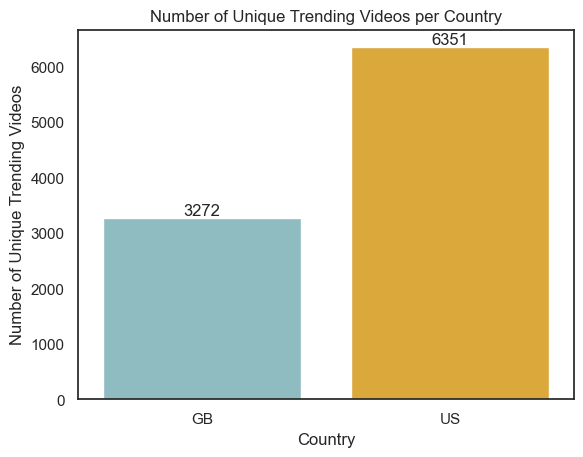

In [65]:
# Plotting the number of unique trending videos during the period
sns.set_style('white')
sns.set_context('notebook')
ax = sns.barplot(data = count_unique_trending_videos, y = 'video_id', x = 'dataset', palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
ax.bar_label(ax.containers[0])
plt.title('Number of Unique Trending Videos per Country')
plt.xlabel('Country')
plt.ylabel('Number of Unique Trending Videos')
plt.show()

We can see that even though both datasets have the same observed time period, the US table contains a higher number of unique videos that have been selected as trending, with over 6,300 videos, compared to over 3,200 videos from GB. 

### 2. Which are the mostly viewed trending videos? 

We will continue by presenting a general view of the top 5 trending videos according to the number of views in GB and compare them to the top 5 trending videos in US. To do so, we combined the top lists for each country and presented them in a horizontal barplot. 

In [42]:
# Top US Videos by views
top_us_videos_views = usvideos.groupby(['dataset', 'video_id', 'title'])['views'].sum().sort_values(ascending = False)[:5].reset_index()

In [43]:
# Top GB Videos by views
top_gb_videos_views = gbvideos.groupby(['dataset', 'video_id', 'title'])['views'].sum().sort_values(ascending = False)[:5].reset_index()

In [66]:
# Concatenating the top videos from US and GB (by views)
top_videos_views = pd.concat([top_us_videos_views, top_gb_videos_views])
top_videos_views = top_videos_views.sort_values('views', ascending = False)

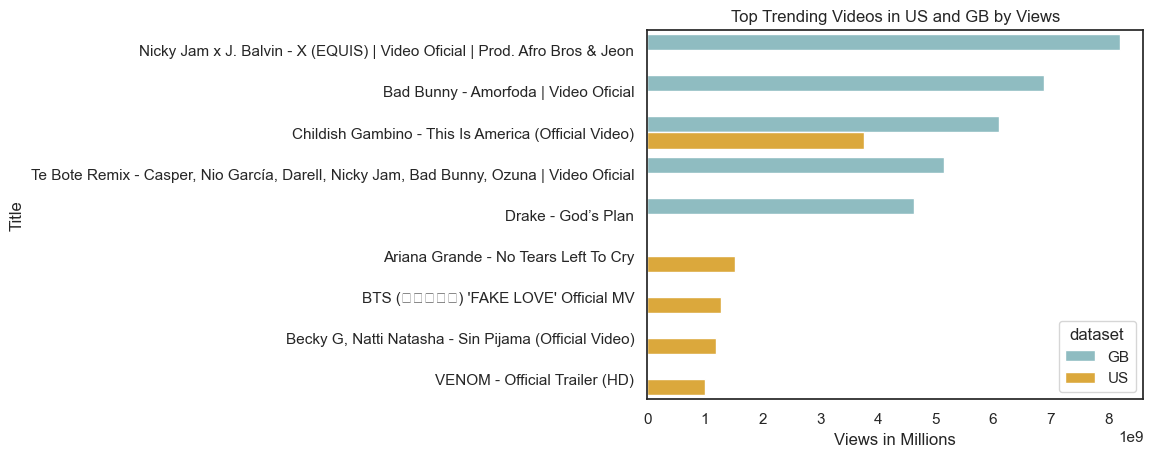

In [68]:
# Previewing the number of Views of Top Trending Videos
sns.set_style('white')
sns.set_context('notebook')
g = sns.barplot(data = top_videos_views, y = 'title', x = 'views', hue = 'dataset', palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
plt.title('Top Trending Videos in US and GB by Views')
plt.xlabel('Views in Millions')
plt.ylabel('Title')
plt.show()

The trending video in GB with the highest views is 'Nicky Jam x J. Balvin -X (EQUIS)', with 8.2 million views during the observed period. For the US, the top video with highest views is 'Childish Gambino - This Is America', with 3.7 million. It is important to note that this video has also been selected as trending video in both countries, and actually, in GB it has generated higher number of views, reaching to a total of 6.1 million views. 

Despite the `USvideos.csv` containing higher number of selected trending videos overall, the top videos from `GBvideos.csv` have significantly higher number of views. 

### 3. Which are the most commented trending videos?

We can do the same exercise but with comments rather than views. An important part of a video of being selected as a trending video, is through the number of comments that the videos have received.

In [46]:
# Top US Videos by comments
top_us_videos_comments = usvideos.groupby(['dataset', 'video_id', 'title'])['comment_count'].sum().sort_values(ascending = False)[:5].reset_index()

In [47]:
# Top GB Videos by comments
top_gb_videos_comments = gbvideos.groupby(['dataset', 'video_id', 'title'])['comment_count'].sum().sort_values(ascending = False)[:5].reset_index()

In [67]:
# Concatenating the top videos from US and GB (by comments)
top_videos_comments = pd.concat([top_us_videos_comments, top_gb_videos_comments])
top_videos_comments = top_videos_comments.sort_values('comment_count', ascending = False)

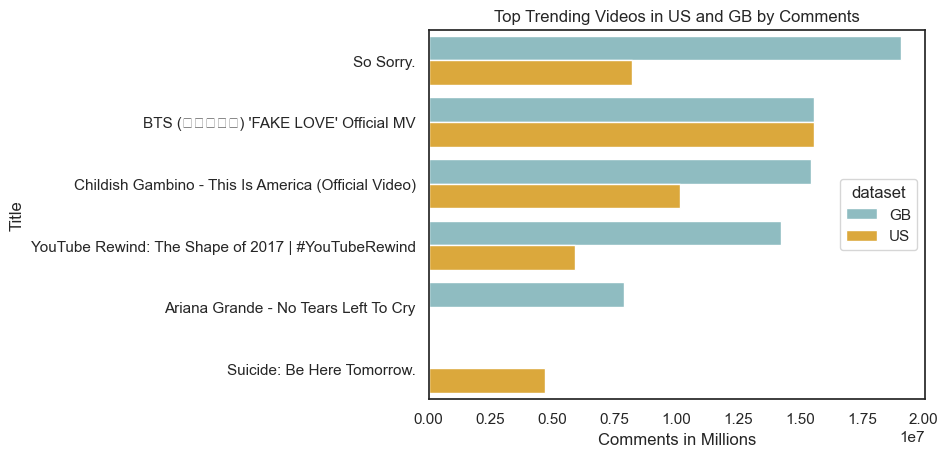

In [69]:
# Previewing the number of Comments of Top Trending Videos
sns.set_style('white')
sns.set_context('notebook')
g = sns.barplot(data = top_videos_comments, y = 'title', x = 'comment_count', hue = 'dataset', palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
plt.title('Top Trending Videos in US and GB by Comments')
plt.xlabel('Comments in Millions')
plt.ylabel('Title')
plt.show()

Regarding the most commented trending videos, it is important to note that some of the most commented trending videos from the US are also some of the most commented videos in GB. For instance, the video 'So Sorry' has been the trending video from the period with the highest number of comments, where almost 19.0 million have come from GB and 8.1 from the US. 

However, in the US, the most commented trending video was BTS, with 15.5 million of comments during the period, and a similar proportion of 15.5 millions from GB. 

### 4. What is the average number of views of trending videos per country?

We have seen that for the top trending videos in GB and US, GB has significantly higher number of views. However, we can expand this insight and calculate the average number of views per video in both countries. 

In [50]:
# Comparing the average number of views in US and GB
print('Average Views US: ' + str(usvideos['views'].mean().round()))
print('Average Views GB: ' + str(gbvideos['views'].mean().round()))

Average Views US: 2360785.0
Average Views GB: 5911944.0


From the previous information, we can again conclude that views in trending videos in GB tend to be significantly higher than those in the US, with the US with a mean view of 2.3 million and GB with an average view of 5.9 million.  

### 5. How have the number of views behaved overtime?

To understand how views have behaved over time, we will generate a lineplot, depicting the average number of views according to the trending date of videos. 

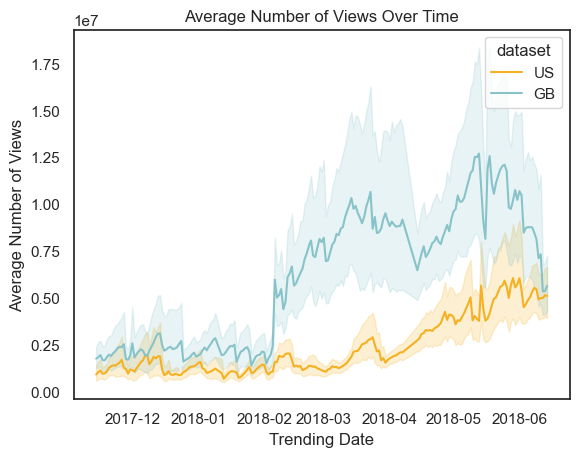

In [72]:
# Previewing the average number of views per date 
sns.set_style('white')
sns.set_context('notebook')
sns.lineplot(us_gb_videos_overall, x = 'trending_date', y = 'views', hue = 'dataset', palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
plt.title('Average Number of Views Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Average Number of Views')
plt.show()

Overtime, the average number of views of trending videos have steadily increased. Videos in GB tend to have a higher average number of views as we mentioned before. However, at the end of the timeline, there is a significant drop in the views for this country. It could be important to understand why this has happened to fully understand if it is just a small period of time in which this will happen, and whether the common rates will keep on in the future.

### 6. What is the average number of likes per video for the US and GB per year?

Many people may have seen trending videos, but it does not necessarily mean that they love them. Let's see how average likes have behaved in both countries per year. 

In [73]:
# Comparing the average number of likes in US and GB per year
usvideos['year_trending'] = usvideos['trending_date'].dt.year
avg_likes_us = usvideos.groupby(['dataset', 'year_trending'])['likes'].mean().round().reset_index()

gbvideos['year_trending'] = gbvideos['trending_date'].dt.year
avg_likes_gb = gbvideos.groupby(['dataset', 'year_trending'])['likes'].mean().round().reset_index()

avg_likes_us_gb = pd.concat([avg_likes_us, avg_likes_gb])
avg_likes_us_gb = avg_likes_us_gb.pivot(index = 'year_trending', columns = 'dataset', values = 'likes')

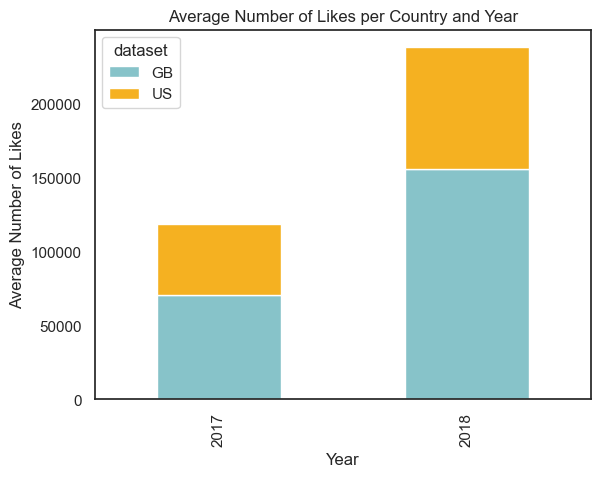

In [53]:
# Plotting the average number of likes per video in the US and GB per year
sns.set_style('white')
sns.set_context('notebook')
avg_likes_us_gb.plot(kind = 'bar', stacked = 'True', color = ['#87c3c9', '#f5b121'])
plt.title('Average Number of Likes per Country and Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Likes')
plt.show()

During 2017, the average likes per video were 47,542 in the US and 70,719 in GB. During 2018, these numbers increased to 82,451 in US and 155,392 in GB. From the previous stacked bar plot, we can see that for both years, GB has contributed to a higher number of average likes compared to US. 

### 7. How have the number of likes behaved overtime? 

It would also be insightful to see if this average number of likes have behaved differently throughout the observed years. Therefore, in this section we will compare this information for both countries. 

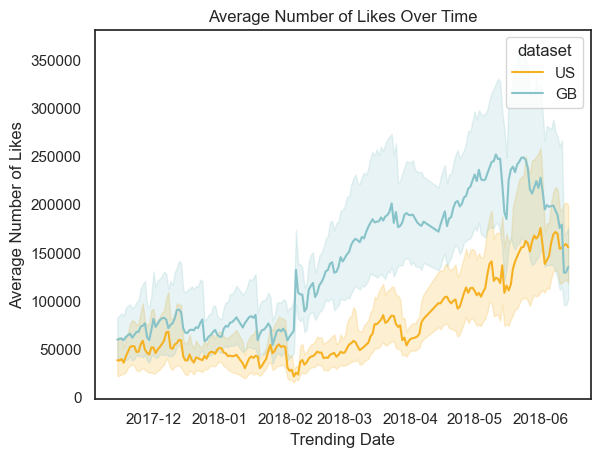

In [54]:
# Previewing the average number of likes per date 
sns.set_style('white')
sns.set_context('notebook')
sns.lineplot(us_gb_videos_overall, x = 'trending_date', y = 'likes', hue = 'dataset', palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
plt.title('Average Number of Likes Over Time')
plt.xlabel('Trending Date')
plt.ylabel('Average Number of Likes')
plt.show()

As seen in the previous lineplot, GB has tended to have higher number of average likes over time, compared to US. Another important fact to note is that throughout times, for both countries, likes have increased steadily. This might be due to the increased trend of giving likes in all social media. 

During the end of the timeline we can see again a significant drop in the average likes on treding videos in GB. This might be due to the reduction in views that we saw in the previous lineplot. 

### 8. What is the median like-dislike ratio for all the videos in both countries?

Now that we know the trending videos and the average views and likes per country, we will calculate the Like/Dislike Ratio, which is the number of likes divided by dislikes. A higher like/dislike ratio means that there are a higher number of likes compared to their number of dislikes per video. Thus, a higher level like/dislike ratio means that there are more people liking the video than disliking it, which is a good performance.  

There might be some cases in which there are no dislikes per video. For these cases, the like/dislike formula will generate an error. Therefore, for the purpose of the analysis, we will set dislikes for these cases to 1, as setting them to null would leave them out of consideration for the analysis. 

In [55]:
# Creating a column of like_dislike_ratio (considering division by 0)
us_gb_videos_overall['like_dislike_ratio'] = np.where(us_gb_videos_overall['dislikes'] != 0, us_gb_videos_overall['likes'] / us_gb_videos_overall['dislikes'], us_gb_videos_overall['likes'] / 1)

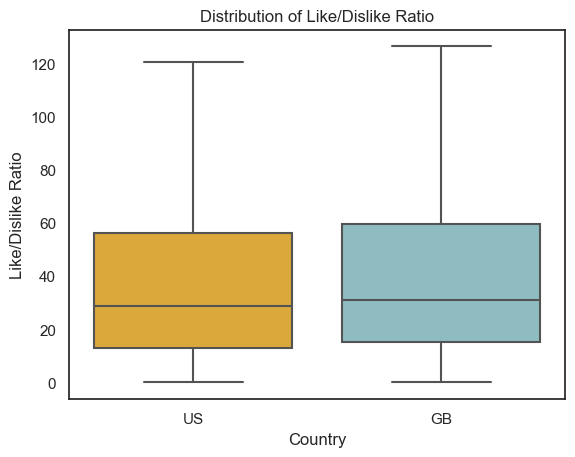

In [56]:
# Looking at the distribution of like_dislike_ratio per country (without considering outliers)
sns.set_style('white')
sns.set_context('notebook')
sns.boxplot(data = us_gb_videos_overall, x = 'dataset', y = 'like_dislike_ratio', showfliers = False, palette = {'US' : '#f5b121', 'GB' : '#87c3c9'})
plt.title('Distribution of Like/Dislike Ratio')
plt.xlabel('Country')
plt.ylabel('Like/Dislike Ratio')
plt.show()

In [57]:
# Getting the general distribution of Like/Dislike Ratios by country
display(us_gb_videos_overall[us_gb_videos_overall['dataset'] == 'US']['like_dislike_ratio'].describe())
us_gb_videos_overall[us_gb_videos_overall['dataset'] == 'GB']['like_dislike_ratio'].describe()

count    40949.000000
mean        43.669569
std         51.298387
min          0.000000
25%         13.054664
50%         28.909091
75%         56.083264
max       1737.333333
Name: like_dislike_ratio, dtype: float64

count     38916.000000
mean         83.568384
std        1819.263167
min           0.000000
25%          15.251071
50%          31.134484
75%          59.789181
max      123856.000000
Name: like_dislike_ratio, dtype: float64

In [58]:
# Calculating the median Like/Dislike Ratios
display(us_gb_videos_overall[us_gb_videos_overall['dataset'] == 'US']['like_dislike_ratio'].median())
us_gb_videos_overall[us_gb_videos_overall['dataset'] == 'GB']['like_dislike_ratio'].median()

28.90909090909091

31.134484457836784

Both the GB and US datasets contain some outliers for the Like/Dislike ratio. For this section, we will mainly focus on the most common data, without considering outliers. In general, for US 50% of the data has a Like/Dislike ratio between 13.0 and 56.0; whereas for GB these numbers fall between 15.2 and 59.7. 

As there are many outliers, taking the average like and dislike ratio would be heavily influenced. Therefore, we take the median Like/Dislike ratio to avoid these skewness of data. For US, the median Like/Dislike ratio is of 28.9, whereas for GB the median ratio is 31.13. 

This means that in general, GB videos tend to be more likes than disliked compared to the US. 

### 9. What is the category which displays the higher number of views per country?

In order to determine which are the main categories from trending videos, we will load each datasets' reference list to match with the category_id for each country. 

In [59]:
# Loading the US category reference list. 
uscategory = pd.read_json('US_category_id.json')

uscategories = {}

for lab, row in uscategory.iterrows():
    items = row['items']
    snippet = items['snippet']
    uscategories[items['id']] = snippet['title']

uscategory_list = pd.DataFrame.from_dict(uscategories, orient='index', columns=['title']).reset_index()
uscategory_list

# Loading the GB category reference list. 
gbcategory = pd.read_json('GB_category_id.json')

gbcategories = {}

for lab, row in gbcategory.iterrows():
    items = row['items']
    snippet = items['snippet']
    gbcategories[items['id']] = snippet['title']

gbcategory_list = pd.DataFrame.from_dict(gbcategories, orient='index', columns=['title']).reset_index()

In [60]:
# Cast category id from referenec list to int datatype. 
uscategory_list['index'] = uscategory_list['index'].astype('int')
gbcategory_list['index'] = gbcategory_list['index'].astype('int')

In [74]:
# Merging the datasets with their corresponding reference list. 
usvideos_with_cat = usvideos.merge(uscategory_list, how = 'left', left_on = 'category_id', right_on = 'index')
usvideos_with_cat.head()

gbvideos_with_cat = gbvideos.merge(gbcategory_list, how = 'left', left_on = 'category_id', right_on = 'index')
gbvideos_with_cat.head()

videos_with_cat = pd.concat([usvideos_with_cat, gbvideos_with_cat])

Now that we have the dataset with their corresponding category title, we can start previewing the distribution of views per category. 

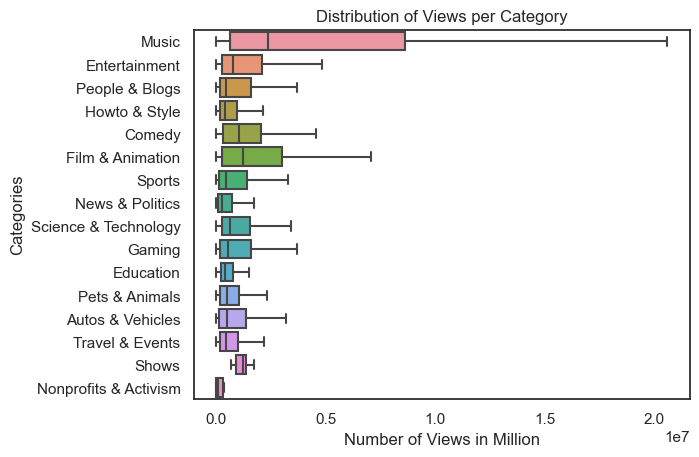

In [62]:
# Getting the mostly viewed categories per country
sns.set_style('white')
sns.set_context('notebook')
sns.boxplot(data = videos_with_cat, x = 'views', y = 'title_y', showfliers = False, order = videos_with_cat['title_y'].value_counts().index)
plt.title('Distribution of Views per Category')
plt.xlabel('Number of Views in Million')
plt.ylabel('Categories')
plt.show()

The previous box plot can show us that the category which has the highest number of trending videos is Music, which is also the category with the widest range in terms of number of views, and also with the highest median views. This can be supported by the fact that within the first sections, we saw that the most viewed videos are mainly from musicians. Next, videos from the categories Shows and Film & Animation are those with the highest median views, followed by Comedy.  

### 10. Is there a relationship between the number of views and number of likes by Category?

Can we infer that if there are a higher number of views, there will be a higher number of likes?

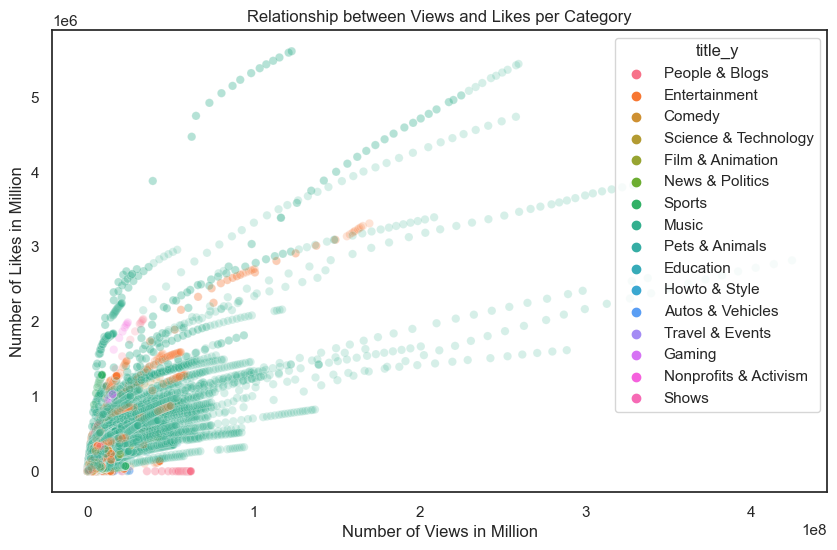

In [78]:
# Viewing the relationship between views and likes. 
sns.set_style('white')
sns.set_context('notebook')
plt.figure(figsize = (10, 6))
sns.scatterplot(data = videos_with_cat, x = 'views', y = 'likes', hue = 'title_y', alpha = 0.2)
plt.title('Relationship between Views and Likes per Category')
plt.xlabel('Number of Views in Million')
plt.ylabel('Number of Likes in Million')
plt.show()

According to the previous scatterplot, we can. Generally, the higher the number the views leads to a higher number of likes. This can be seen for the majority of categories that we are inspecting. 

### 11. Do videos which are most polarizing get shared the most?

Unfortunately, even though it would be very insightful to know this, from the current information we could not obtain the data. In order to make an analysis of shares by polarization, we would require the following information:

1. Degree of polarization per video (to determine numerically the level and compare against other videos). 
2. Number of shares per video. 

With this information, we could start getting sense on whether most polarizing videos are shared the most. As a hypothesis, this might seem correct, but without the actual data, we might not be able to reach to the actual conclusion. 

## Conclusion

- During the observed period, there were more trending YouTube videos in the US than in GB. However, GB videos tend to generate higher average numbers of views and comments. 
- The average number of views in US is 2,360,785; whereas the saame number for GB is 5,911,944 views. 
- Average views have increased steadily over the past years, except for recent months in GB. It would be insightful to gather more data to understand why there has been a decrease in the number of views of trending videos in the region. 
- GB tends to have a higher Like/Dislike Ratio than US, which means that videos tend to have a higher proportions of likes compared to dislikes. 
- The category which has displayed the higher number of views for trending videos is Music. 
- It would be insightful to understand whether most polarizing videos are shared the most. For this, we would require a degree of polarization per video, and the number of shares per video. 